In [ ]:
import os
import xml.etree.ElementTree as ET
import cv2
import matplotlib.pyplot as plt


In [14]:
# Define the paths to the image folder and annotations
images_path = "../Potholes/annotated-images"
annotations_path = "../Potholes/annotated-images"

In [15]:
# Helper function to parse the XML file
def parse_xml(annotation_file):
    tree = ET.parse(annotation_file)
    root = tree.getroot()
    boxes = []
    
    for obj in root.findall('object'):
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)
        boxes.append((xmin, ymin, xmax, ymax))
    
    return boxes

In [16]:
# Helper function to display an image with bounding boxes
def visualize_image(image_file, boxes):
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    for (xmin, ymin, xmax, ymax) in boxes:
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
    
    plt.imshow(image)
    plt.axis('off')
    plt.show()

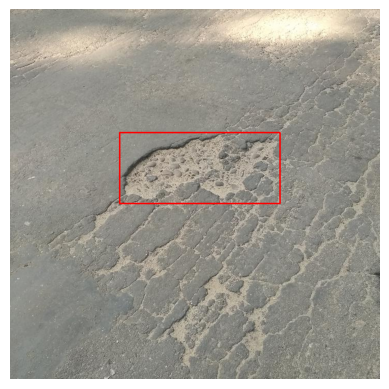

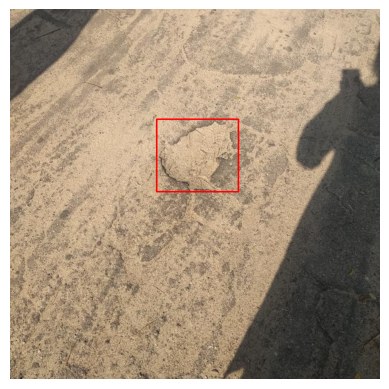

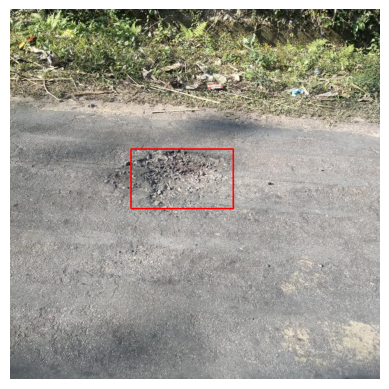

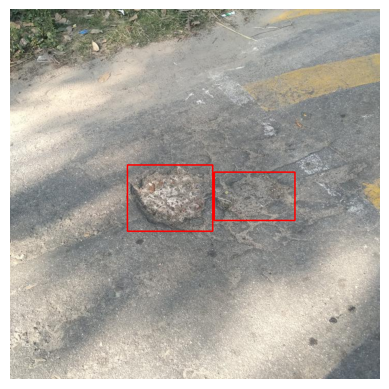

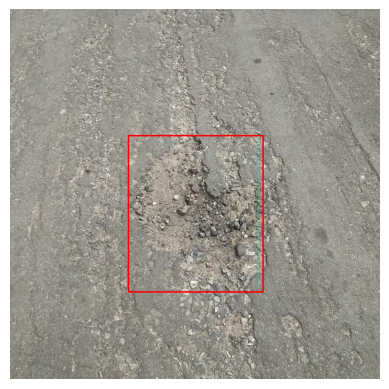

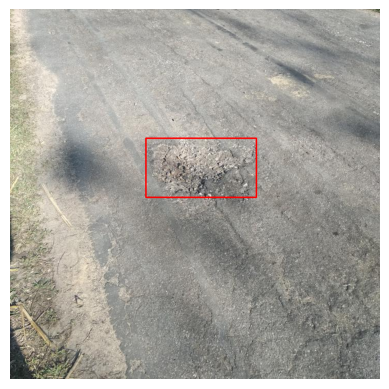

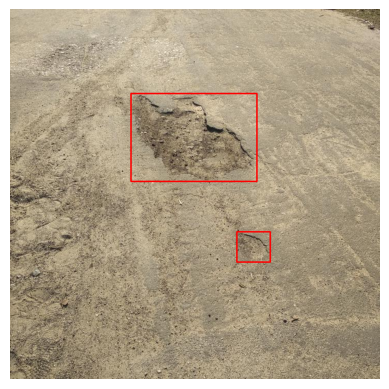

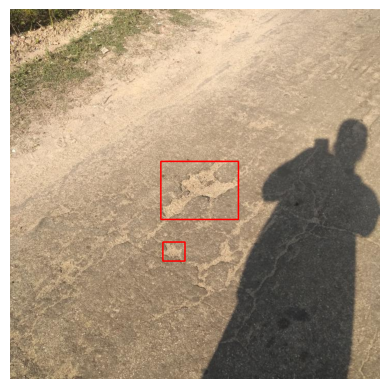

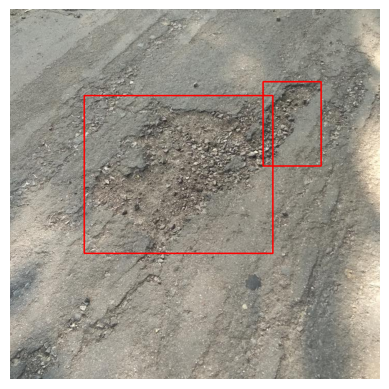

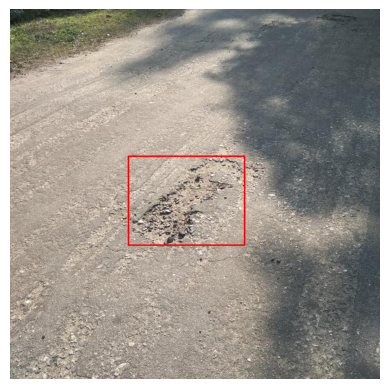

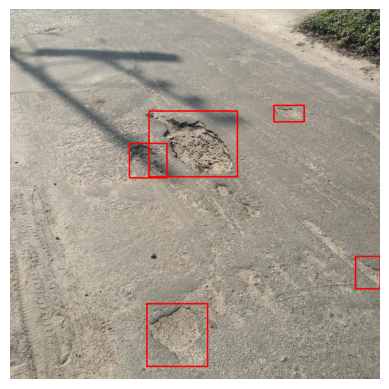

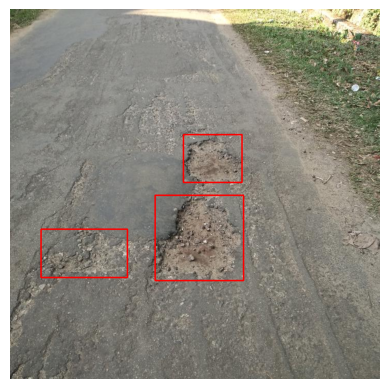

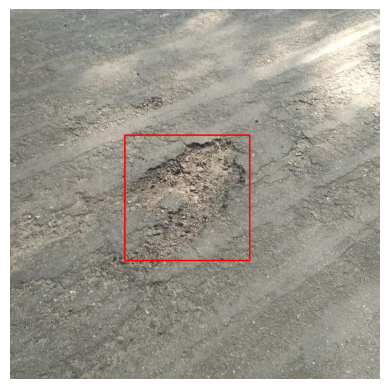

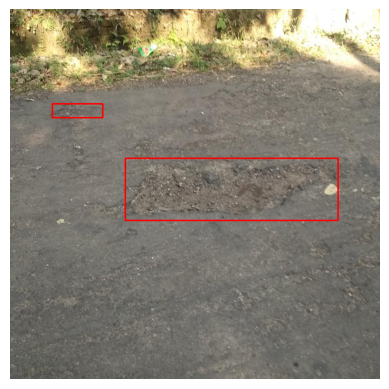

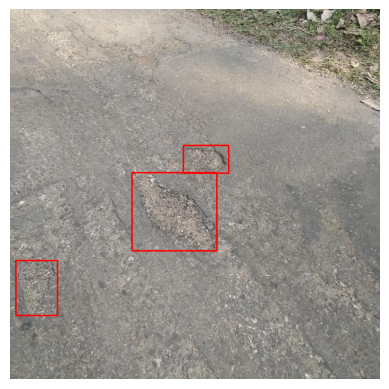

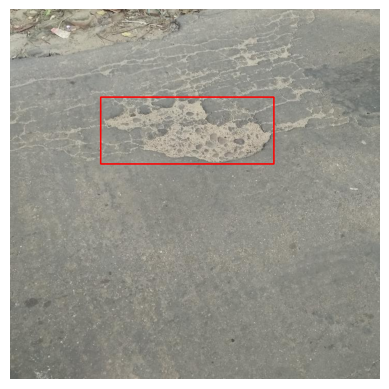

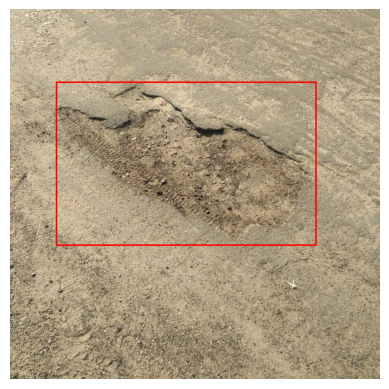

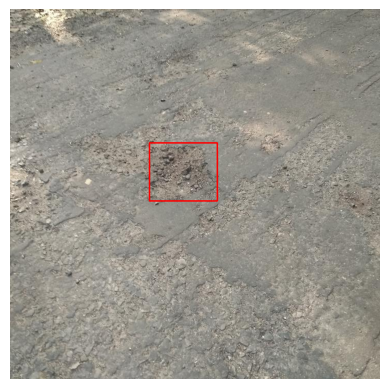

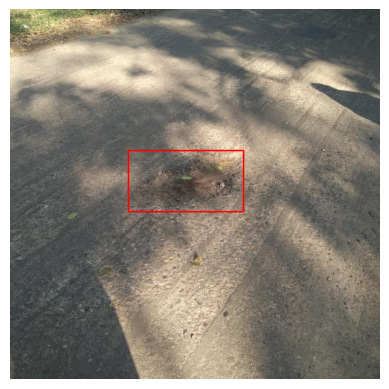

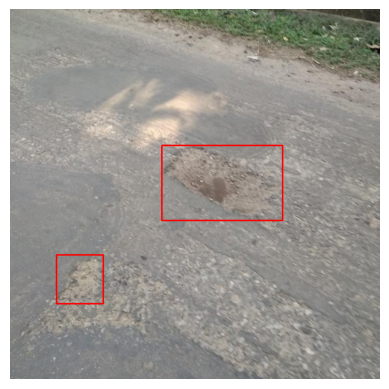

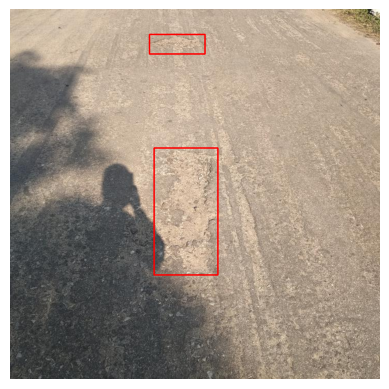

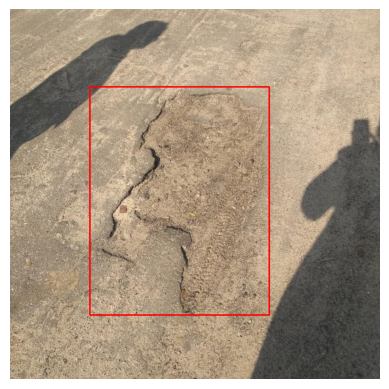

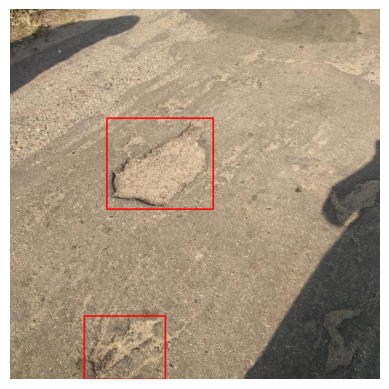

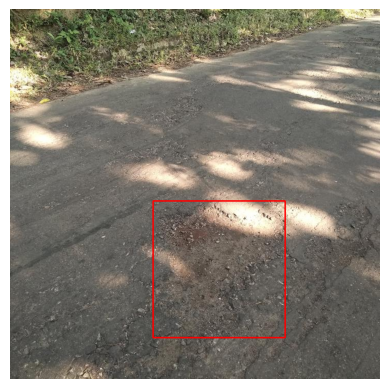

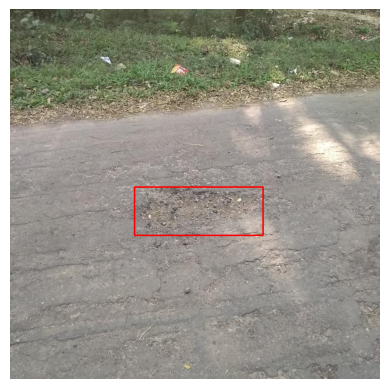

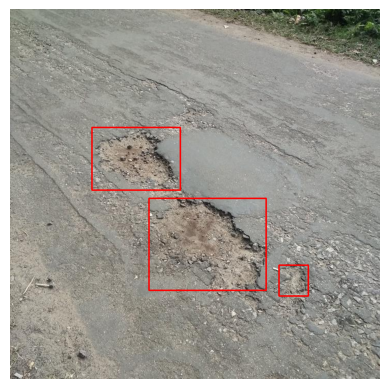

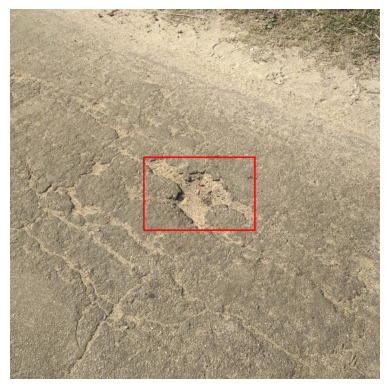

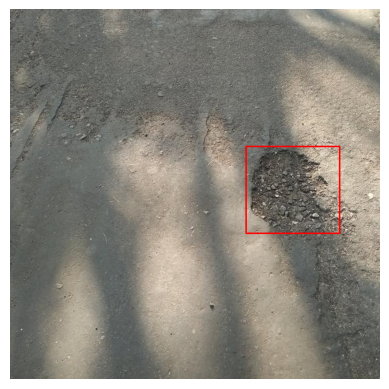

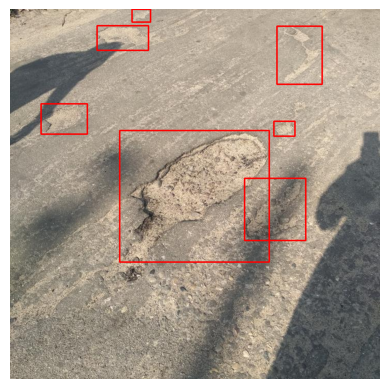

In [19]:
# Loop through some images and visualize them
for image_filename in os.listdir(images_path):
    if image_filename.endswith(".jpg"):
        image_path = os.path.join(images_path, image_filename)
        xml_filename = image_filename.replace(".jpg", ".xml")
        xml_path = os.path.join(annotations_path, xml_filename)
        
        if os.path.exists(xml_path):
            boxes = parse_xml(xml_path)
            visualize_image(image_path, boxes)
            
        # Display only a few examples for familiarity
        if len(boxes) > 5:
            break  # Remove this line if you want to display more images